In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Probability Distributions in Machine Learning

---

## 1. Bernoulli Distribution

### 📌 Definition:
A Bernoulli distribution is a discrete distribution with only two possible outcomes:
- Success (1) with probability \( p \)
- Failure (0) with probability \( 1 - p \)

### 🔢 PMF (Probability Mass Function):
$$ P(X = x) = p^x (1 - p)^{1 - x} \quad \text{for } x \in \{0, 1\} $$

### 💡 Example:
Tossing a biased coin where heads = 1 (success), tails = 0 (failure), and \( p = 0.7 \).


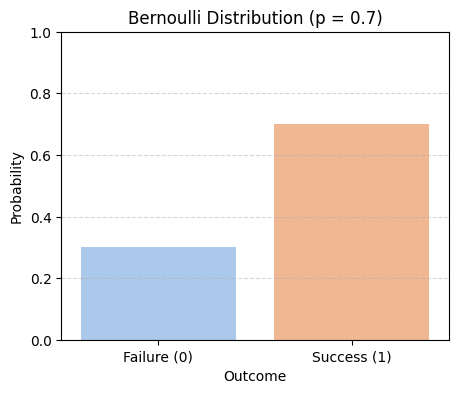

In [3]:
p = 0.7
x = [0, 1]
probs = [1 - p, p]

plt.figure(figsize=(5, 4))
sns.barplot(x=x, y=probs, palette="pastel", hue=x, legend=False)
plt.title("Bernoulli Distribution (p = 0.7)")
plt.ylabel("Probability")
plt.xlabel("Outcome")
plt.ylim(0, 1)
plt.xticks([0, 1], ['Failure (0)', 'Success (1)'])
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

## 2. Binomial Distribution

### 📌 Definition:
The binomial distribution models the number of successes in \( n \) independent Bernoulli trials.

### 🔢 PMF:
$$ P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k} $$

### 💡 Example:
You flip a coin 10 times, and the probability of getting heads (success) is \( p = 0.6 \). What does the distribution of number of heads look like?

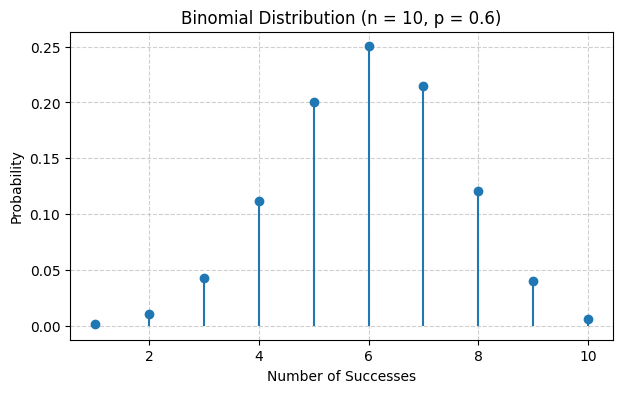

In [4]:
from scipy.stats import binom

n = 10  # number of trials
p = 0.6 # probability of success
x = np.arange(1, n+1)
y = binom.pmf(x, n, p)

plt.figure(figsize=(7, 4))
plt.stem(x, y, basefmt=" ")  # Removed 'use_line_collection'
plt.title(f"Binomial Distribution (n = {n}, p = {p})")
plt.xlabel("Number of Successes")
plt.ylabel("Probability")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### 🎯 Real-World Application:
Used to model tasks like:
- Number of clicks in a batch of 100 emails
- Number of students passing an exam out of a class

---

## 3. Poisson Distribution

### 📌 Definition:
The Poisson distribution models the number of events occurring in a fixed interval of time or space, given a known average rate $$ \lambda $$.

### 🔢 PMF:
$$ P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!} $$

### 💡 Example:
Average 3 calls per minute received at a call center. What is the probability of receiving exactly 5 calls in a minute?


Probability of receiving exactly 5 calls in a minute: 0.1008


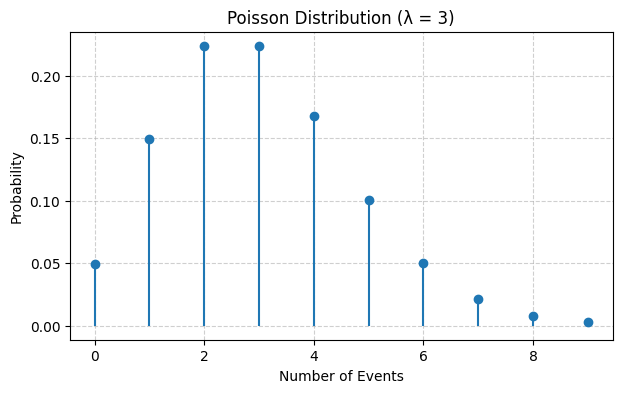

In [25]:
from scipy.stats import poisson

lambda_ = 3

k = 5
probability = poisson.pmf(k, mu=lambda_)
print(f"Probability of receiving exactly 5 calls in a minute: {probability:.4f}")

x = np.arange(0, 10)
y = poisson.pmf(x, mu=lambda_)

plt.figure(figsize=(7, 4))
plt.stem(x, y, basefmt=" ")
plt.title(f"Poisson Distribution (λ = {lambda_})")
plt.xlabel("Number of Events")
plt.ylabel("Probability")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 4. Uniform Distribution

### 📌 Definition:
The uniform distribution assigns equal probability to all outcomes in a continuous interval [a, b].

### 🔢 PDF:
$$ f(x) = \frac{1}{b - a} \quad \text{for } a \leq x \leq b $$

### 💡 Example:
Rolling a fair die or picking a random number between 0 and 1.

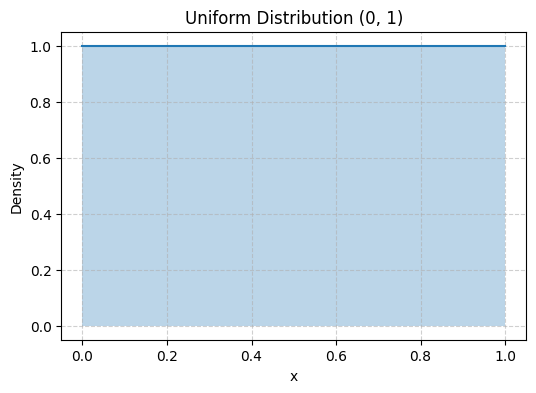

In [6]:
from scipy.stats import uniform

x = np.linspace(0, 1, 100)
y = uniform.pdf(x, loc=0, scale=1)

plt.figure(figsize=(6, 4))
plt.plot(x, y, label='Uniform PDF')
plt.fill_between(x, y, alpha=0.3)
plt.title("Uniform Distribution (0, 1)")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 5. Normal (Gaussian) Distribution

### 📌 Definition:
The most common continuous distribution, shaped like a bell curve. Defined by mean $$ \mu $$ and standard deviation $$ \sigma $$.

### 🔢 PDF:
$$ f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$

### 💡 Example:
Height, test scores, etc., usually follow normal distribution.

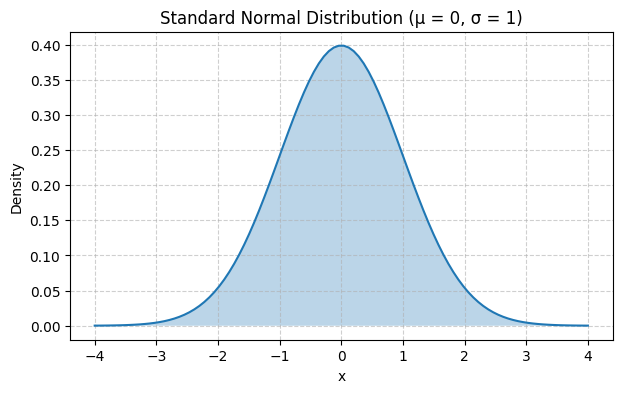

In [7]:
from scipy.stats import norm

mu = 0
sigma = 1
x = np.linspace(-4, 4, 100)
y = norm.pdf(x, mu, sigma)

plt.figure(figsize=(7, 4))
plt.plot(x, y, label='Normal PDF')
plt.fill_between(x, y, alpha=0.3)
plt.title("Standard Normal Distribution (μ = 0, σ = 1)")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 6. Exponential Distribution

### 📌 Definition:
Models the time between events in a Poisson process.

### 🔢 PDF:
$$ f(x; \lambda) = \lambda e^{-\lambda x} \quad x \geq 0 $$

### 💡 Example:
Time between arrivals at a service center, decay time of particles.


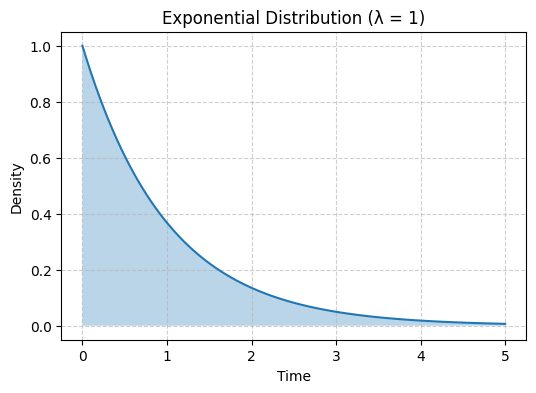

In [8]:
from scipy.stats import expon

lambda_ = 1
x = np.linspace(0, 5, 100)
y = expon.pdf(x, scale=1/lambda_)

plt.figure(figsize=(6, 4))
plt.plot(x, y)
plt.fill_between(x, y, alpha=0.3)
plt.title("Exponential Distribution (λ = 1)")
plt.xlabel("Time")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 7. Central Limit Theorem (CLT)

### 📌 Definition:
The Central Limit Theorem states that the sampling distribution of the sample mean approaches a normal distribution as the sample size increases, regardless of the population's distribution.

### 💡 Example:
Let’s take a uniform distribution and plot sample means from it.

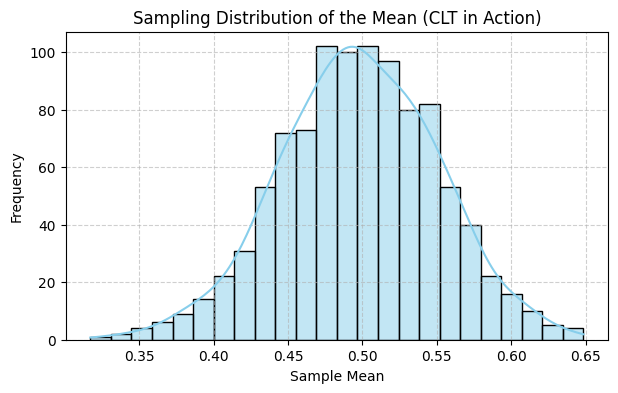

In [9]:
np.random.seed(0)
sample_means = []
for _ in range(1000):
    sample = np.random.uniform(0, 1, 30)  # sample of size 30
    sample_means.append(np.mean(sample))

plt.figure(figsize=(7, 4))
sns.histplot(sample_means, kde=True, color="skyblue")
plt.title("Sampling Distribution of the Mean (CLT in Action)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 8. Sampling Methods

### 🎯 Common Sampling Techniques:
- **Random Sampling**: Each element has equal chance of being selected
- **Stratified Sampling**: Population divided into subgroups (strata), samples taken from each
- **Systematic Sampling**: Every $$ k^{th} $$ item is selected
- **Cluster Sampling**: Population is divided into clusters, some clusters are randomly selected

## 9. Hypothesis Testing

### 📌 Definition:
Hypothesis testing is a statistical method that helps us make decisions using data. We formulate two competing hypotheses:
- **Null Hypothesis (H₀)**: Assumes no effect or no difference
- **Alternative Hypothesis (H₁)**: What we aim to support (e.g., there is an effect or difference)

### 🔍 Common Terms:
- **p-value**: Probability of getting the observed result, or more extreme, under H₀.
- **Significance level (α)**: Threshold for rejecting H₀, commonly 0.05.
- **Type I Error**: Rejecting H₀ when it's true.
- **Type II Error**: Failing to reject H₀ when H₁ is true.

### 🧪 Example: One Sample t-test
Is the mean of a sample significantly different from a known population mean?

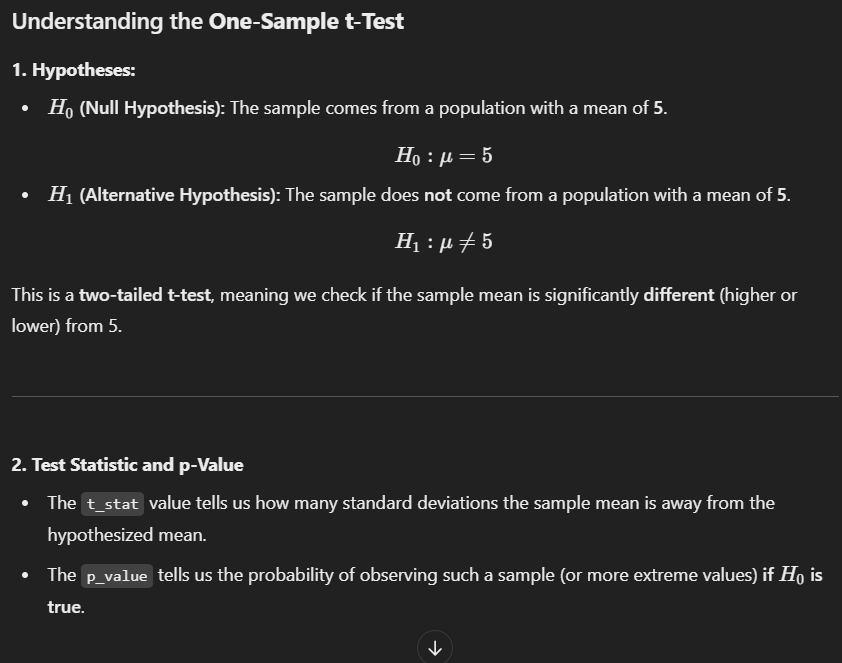

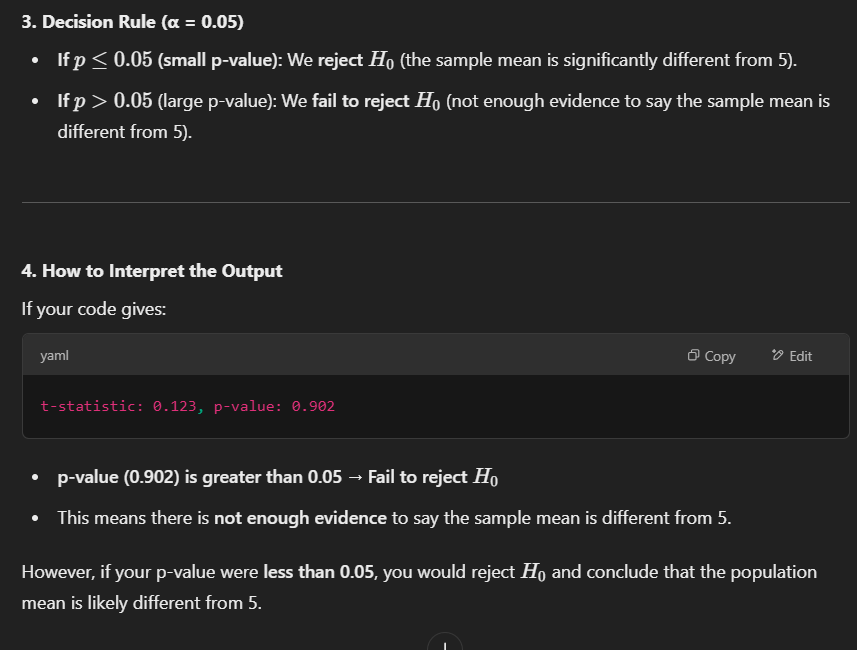

In [26]:
from scipy.stats import ttest_1samp

np.random.seed(0)
sample = np.random.normal(loc=5, scale=2, size=30)
mu_0 = 5  # hypothesized population mean

t_stat, p_value = ttest_1samp(sample, mu_0)
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")
# small p-val. we reject H0 (population mean likely different from 5)

t-statistic: 2.204, p-value: 0.036


### 📈 Visual:

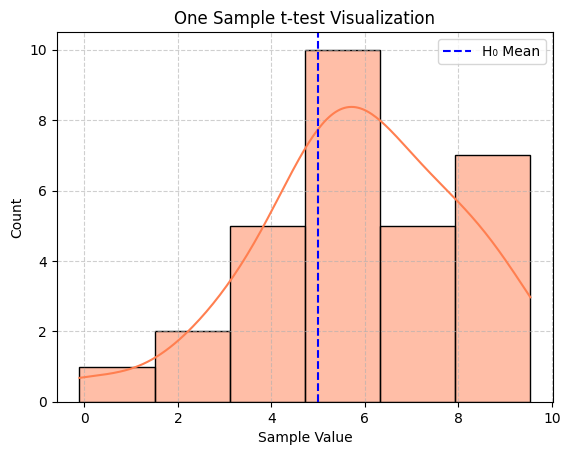

In [27]:
sns.histplot(sample, kde=True, color="coral")
plt.axvline(mu_0, color='blue', linestyle='--', label='H₀ Mean')
plt.title("One Sample t-test Visualization")
plt.xlabel("Sample Value")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Advanced Statistical Topics for Machine Learning

---

## 1. Cumulative Distribution Function (CDF)

### 📌 Definition:
The CDF of a random variable X is defined as:
$$ F(x) = P(X \leq x) $$

It gives the probability that the variable is less than or equal to a particular value.

---
### 💡 Example: Normal Distribution CD

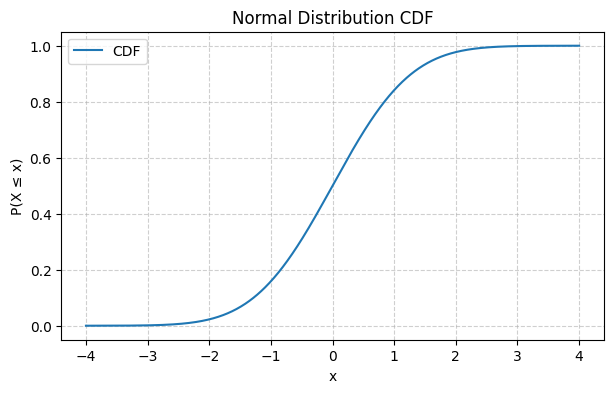

In [ ]:
x = np.linspace(-4, 4, 1000)
y = norm.cdf(x, loc=0, scale=1)

plt.figure(figsize=(7, 4))
plt.plot(x, y, label='CDF')
plt.title("Normal Distribution CDF")
plt.xlabel("x")
plt.ylabel("P(X ≤ x)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

## 2. Z-Score & Standardization

### 📌 Definition:
$$ z = \frac{x - \mu}{\sigma} $$

It tells how many standard deviations a point is from the mean.

### 💡 Visual Explanation:


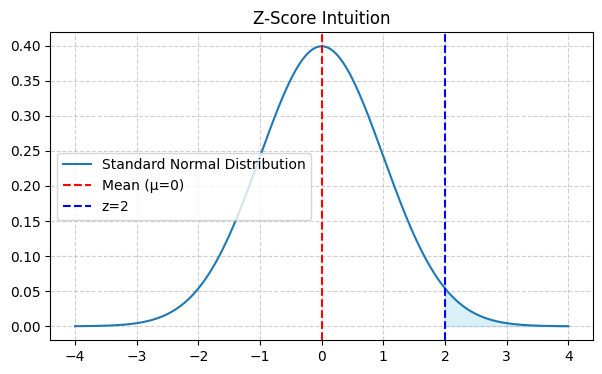

In [13]:
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

plt.figure(figsize=(7, 4))
plt.plot(x, y, label='Standard Normal Distribution')
plt.axvline(0, color='red', linestyle='--', label='Mean (μ=0)')
plt.axvline(2, color='blue', linestyle='--', label='z=2')
plt.fill_between(x, y, where=(x>2), color='skyblue', alpha=0.3)
plt.legend()
plt.title("Z-Score Intuition")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


## 3. Confidence Intervals

### 📌 Definition:
A range of values that's likely to contain a population parameter with a certain confidence level (e.g., 95%).

### 💡 Example (Normal Approximation):

In [14]:
import scipy.stats as stats

np.random.seed(0)
sample = np.random.normal(loc=5, scale=2, size=100)
mean = np.mean(sample)
std_err = stats.sem(sample)
ci = stats.t.interval(0.95, len(sample)-1, loc=mean, scale=std_err)

print(f"95% Confidence Interval: {ci}")

95% Confidence Interval: (np.float64(4.717629641993193), np.float64(5.521602420144747))


## 4. QQ-Plots / Distribution Fitting

### 📌 Definition:
Quantile-Quantile plots compare the quantiles of your data to a theoretical distribution to check fit.

### 💡 Example:

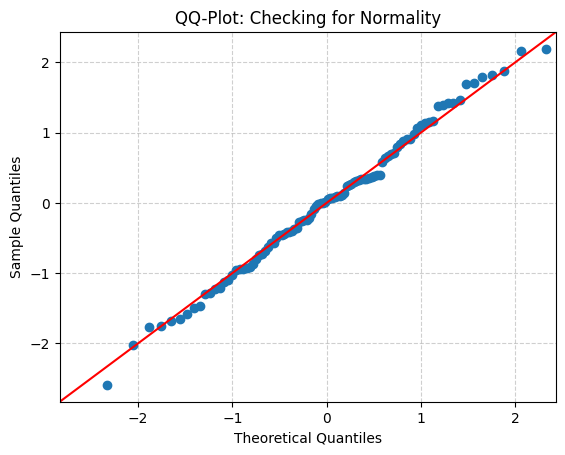

In [17]:
import statsmodels.api as sm

sm.qqplot(sample, line='45', fit=True)
plt.title("QQ-Plot: Checking for Normality")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 5. Chi-Square Distribution

### 📌 Application:
Used in goodness-of-fit tests and testing for independence.

### 💡 Example: Feature Independence Test

In [ ]:
from scipy.stats import chi2_contingency

data = [[30, 10], [20, 40]]  # contingency table
chi2, p, dof, expected = chi2_contingency(data)
print(f"Chi2 Statistic: {chi2}, p-value: {p}")

Chi2 Statistic: 15.041666666666666, p-value: 0.00010516355403363098


## 6. T-Distribution vs Normal Distribution

### 📌 Key Differences:
- **T-distribution** is used when sample size is small (<30) and population std dev is unknown.
- It has heavier tails than the normal distribution.

### 💡 Plot:

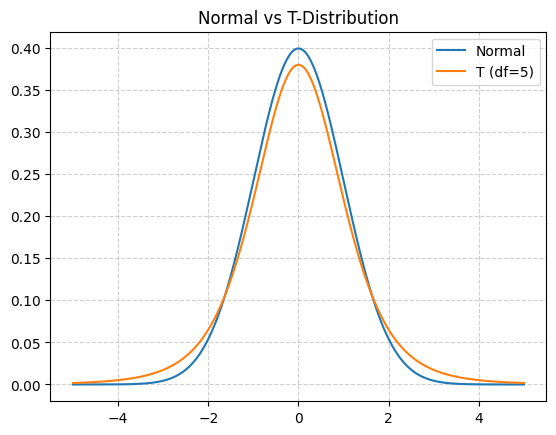

In [19]:
x = np.linspace(-5, 5, 1000)
plt.plot(x, stats.norm.pdf(x), label='Normal')
plt.plot(x, stats.t.pdf(x, df=5), label='T (df=5)')
plt.legend()
plt.title("Normal vs T-Distribution")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 7. Multivariate Distributions (Optional)

### 📌 Why:
Used in multivariate Gaussian modeling, Gaussian Naive Bayes, etc.

### 💡 Visualizing a 2D Gaussian:

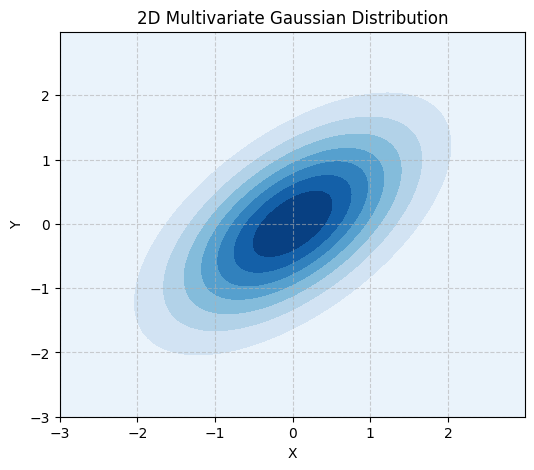

In [20]:
from scipy.stats import multivariate_normal

mean = [0, 0]
cov = [[1, 0.6], [0.6, 1]]
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))
rvg = multivariate_normal(mean, cov)

plt.figure(figsize=(6, 5))
plt.contourf(x, y, rvg.pdf(pos), cmap="Blues")
plt.title("2D Multivariate Gaussian Distribution")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 8. Extensive Hypothesis Testing Examples

### 🧪 Example 1: Two Sample t-test

In [ ]:
group1 = np.random.normal(loc=5, scale=1.5, size=50)
group2 = np.random.normal(loc=5.5, scale=1.5, size=50)
t_stat, p_val = stats.ttest_ind(group1, group2)
print(f"Two Sample t-test: t = {t_stat:.2f}, p = {p_val:.4f}")

# reject H0 i.e accept H1 i.e both groups has different means

Two Sample t-test: t = -2.30, p = 0.0236


### 🧪 Example 2: Paired t-test

In [43]:
before = np.random.normal(70, 10, 30)
after = before + np.random.normal(-5, 5, 30)
t_stat, p_val = stats.ttest_rel(before, after)
print(f"Paired t-test: t = {t_stat:.2f}, p = {p_val:.4f}")

Paired t-test: t = 4.99, p = 0.0000


### 🧪 Example 3: Proportion z-test (using statsmodels)

In [23]:
import statsmodels.api as sm
count = np.array([30, 20])
nobs = np.array([100, 100])
z_stat, p_val = sm.stats.proportions_ztest(count, nobs)
print(f"Z-test for proportions: z = {z_stat:.2f}, p = {p_val:.4f}")

Z-test for proportions: z = 1.63, p = 0.1025
